# **Projeto do Bootcamp**

### **Neste NoteBook será analisado se a cobertura vacinal entre 2007 e 2020 se comporta de modo a influenciar o orçamento dos gastos dos estados da federação.** 

#### Vacinas tem o objetivo de imunizar as pessoas e prevenir que estas fiquem doentes em virtude de alguma infecção viral ou bacteriana. Quanto mais pessoas imunizadas dentro do Programa Nacional de Imunização, que visa a prevenção de doenças imunopreviníveis, menores serão os custos onerados ao sistema de saúde e menores serão os gastos públicos. 

#### Para dar início às análises, as bibliotecas necessárias serão importadas!

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### **Os dois datasets utilizados nesta análise podem ser encontrados no banco de dados do sus: http://www2.datasus.gov.br/DATASUS/index.php?area=02**

In [2]:
dados_orcamento = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv", 
           encoding = 'ISO-8859-1', skiprows = 3, sep = ";", skipfooter = 12, thousands = ".", decimal = ",")
dados_orcamento.head()

C:\Users\Gustavo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


In [6]:
pd.options.display.float_format = "{:.2f}".format

In [9]:
##O comando index só devolve esse resultado quando colocamos outro comando, como o .mean()

colunas_usaveis = dados_orcamento.mean().index
colunas_usaveis

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

In [13]:
colunas_usaveis = dados_orcamento.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


### **Haviam muitos dados faltantes. Como não era possível preencher os campos de modo inferencial, optei por retirar os dados da análise para não enviesar ou atrapalhar a análise do período (2007 - 2020) que contem todas as informações necessárias.**

In [14]:
usaveis = dados_orcamento[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


### **Estes são os dados relativos aos gastos em saúde de cada Unidade da Federação.**

In [16]:
usaveis

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71
5,16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,...,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,291637984.75
6,17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,...,7594175.34,7573064.95,7225320.39,7341171.88,7025821.12,6204453.42,6732370.56,5018138.13,4489665.87,999998621.85
7,21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,...,30849081.57,29632234.87,31256187.80,28457299.99,28832662.46,23938156.77,32979447.97,31128144.66,24374205.15,3632860959.84
8,22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,...,17649092.71,16846903.02,17312889.65,16264613.57,15318975.43,11878587.16,14175053.45,15375523.59,18019214.49,2130616492.35
9,23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,...,50213511.70,48447583.61,53086389.30,49015303.22,46395356.97,43468816.62,54200339.48,42146555.81,30809221.22,6197357245.98


### **Estes são os dados relativos a cobertura vacinal de cada Unidade da Federação**

In [20]:
cobertura_imunizacao = pd.read_csv("imunizacao.csv", encoding = 'ISO-8859-1', sep = ";")
cobertura_imunizacao

,Unidade da Federação,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,11 Rondônia,671022,670070,681503,647582,435345,427785,487788,664623,692060,619782,490277,464224,472702,427147,7851910
1,12 Acre,386861,379638,390602,375827,257132,240469,240916,254867,294119,259444,226433,233104,257688,194545,3991645
2,13 Amazonas,1704003,1647149,1703841,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1199874,1212871,1309691,1067561,19590145
3,14 Roraima,218408,203350,225293,216961,146403,134478,137917,223255,261569,223781,205714,192654,187129,155341,2732253
4,15 Pará,3997712,3856972,3699454,3535221,2159285,2120596,2217128,2577588,2121121,1986047,1736141,1772620,1922339,1605941,35308165
5,16 Amapá,326178,319122,354299,318085,200416,201291,235158,291264,317476,309878,195133,207205,223781,136605,3635891
6,17 Tocantins,647636,625972,629942,599042,393544,364498,419059,520696,500465,473930,408612,410564,430499,405325,6829784
7,21 Maranhão,3478280,3335303,3299816,3420909,1938353,1834049,2049197,2506954,2470155,1768910,1596896,1613975,1525893,1210112,32048802
8,22 Piauí,1409679,1340657,1344452,1274272,790815,767241,830563,929808,843986,766717,691420,721043,707044,647022,13064719
9,23 Ceará,3578539,3408148,3436035,3358407,1973183,1875068,2162076,3097412,3090798,2772563,2258857,2339327,2007863,1881461,37239737


### **Não precisamos dos números que representam o index da tabela que o Pandas trás como padrão. Para tanto, iremos utilizar a Unidade da Federação como o novo Index para ambos os datasets**

In [21]:
usaveis.set_index('Unidade da Federação', inplace = True)

cobertura_imunizacao.set_index('Unidade da Federação', inplace = True)

In [22]:
usaveis.head(2)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63


In [27]:
cobertura_imunizacao.tail(2)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Unidade da Federação,,,,,,,,,,,,,,,
53 Distrito Federal,1035290,1000883,1002519,977874,582929,615304,858143,1000131,732494,1331740,694232,743681,732326,702299,12009845
Total,75177841,72922335,74411131,73202221,44640471,42720182,49110580,63842324,63025044,53191124,45232082,46271951,44888238,40622611,789258135


### **Nesta etapa estou retirando a coluna e a linha que representa os valores totais das Unidades da Federação de ambos os datasets, pois não serão inclusas nos gráficos com o intuito de preservar uma boa visualização e proporção para comparação.**

In [31]:
cobertura_imunizacao = cobertura_imunizacao.drop('Total', axis = 0)

KeyError: "['Total'] not found in axis"

In [40]:
usaveis.head(2)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63


In [69]:
del usaveis['Total']

In [59]:
cobertura_imunizacao.head(2)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Unidade da Federação,,,,,,,,,,,,,,,
11 Rondônia,671022,670070,681503,647582,435345,427785,487788,664623,692060,619782,490277,464224,472702,427147,7851910
12 Acre,386861,379638,390602,375827,257132,240469,240916,254867,294119,259444,226433,233104,257688,194545,3991645


In [107]:
colunas = cobertura_imunizacao.columns[:14]
cobertura_imunizacao = cobertura_imunizacao[colunas]
cobertura_imunizacao.head(2)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,
11 Rondônia,671022,670070,681503,647582,435345,427785,487788,664623,692060,619782,490277,464224,472702,427147
12 Acre,386861,379638,390602,375827,257132,240469,240916,254867,294119,259444,226433,233104,257688,194545


In [112]:
cobertura_imunizacao

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,
11 Rondônia,671022,670070,681503,647582,435345,427785,487788,664623,692060,619782,490277,464224,472702,427147
12 Acre,386861,379638,390602,375827,257132,240469,240916,254867,294119,259444,226433,233104,257688,194545
13 Amazonas,1704003,1647149,1703841,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1199874,1212871,1309691,1067561
14 Roraima,218408,203350,225293,216961,146403,134478,137917,223255,261569,223781,205714,192654,187129,155341
15 Pará,3997712,3856972,3699454,3535221,2159285,2120596,2217128,2577588,2121121,1986047,1736141,1772620,1922339,1605941
16 Amapá,326178,319122,354299,318085,200416,201291,235158,291264,317476,309878,195133,207205,223781,136605
17 Tocantins,647636,625972,629942,599042,393544,364498,419059,520696,500465,473930,408612,410564,430499,405325
21 Maranhão,3478280,3335303,3299816,3420909,1938353,1834049,2049197,2506954,2470155,1768910,1596896,1613975,1525893,1210112
22 Piauí,1409679,1340657,1344452,1274272,790815,767241,830563,929808,843986,766717,691420,721043,707044,647022


### **Visualizaremos os dados divididos por macrorregião e os dados dos gastos em saúde serão comparados com a cobertura vacinal. Após a visualização, iremos arrumar os dados que ainda estejam atrapalhando uma boa visualização e melhorar os gráficos para que possam passar uma mensagem acurada.**

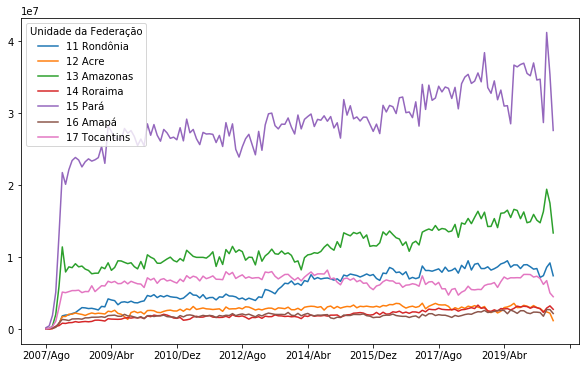

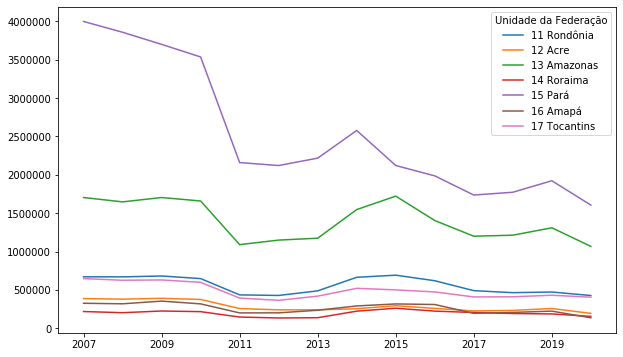

In [116]:
(usaveis[:7].T.plot(figsize = (10,6)), cobertura_imunizacao[:7].T.plot(figsize = (10,6)))
plt.show()

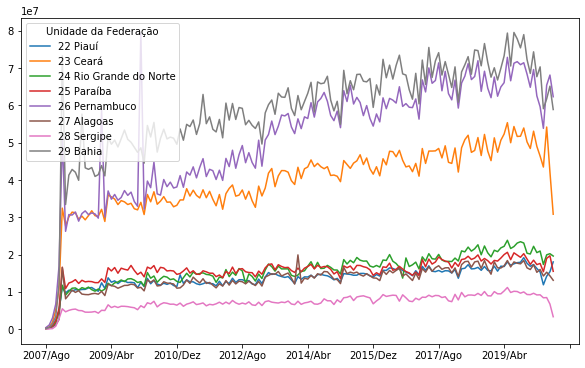

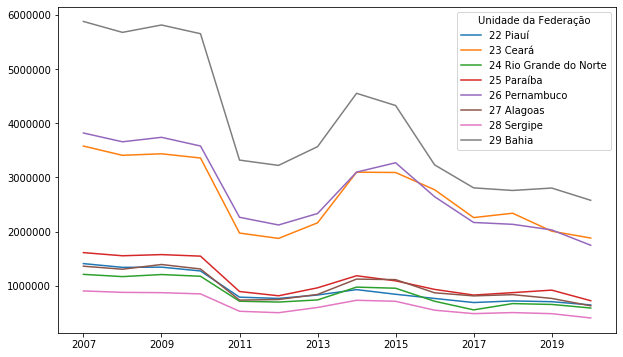

In [118]:
(usaveis[8:16].T.plot(figsize = (10,6)), cobertura_imunizacao[8:16].T.plot(figsize = (10,6)))
plt.show()

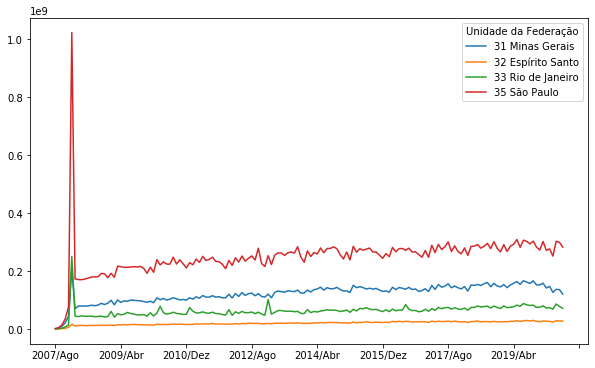

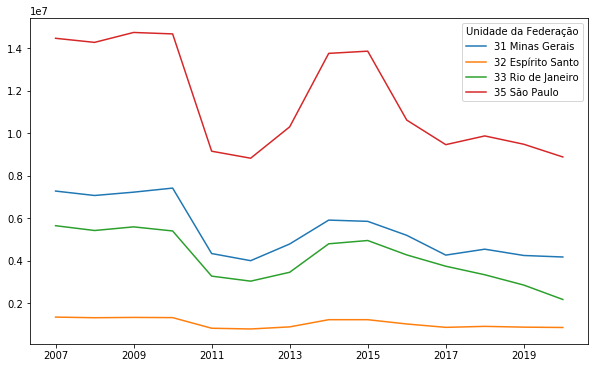

In [121]:
(usaveis[16:20].T.plot(figsize = (10,6)), cobertura_imunizacao[16:20].T.plot(figsize = (10,6)))
plt.show()

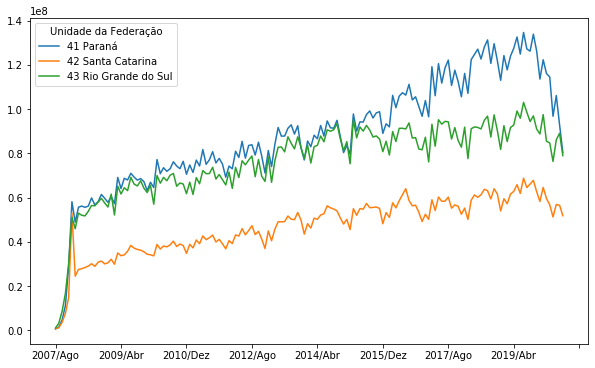

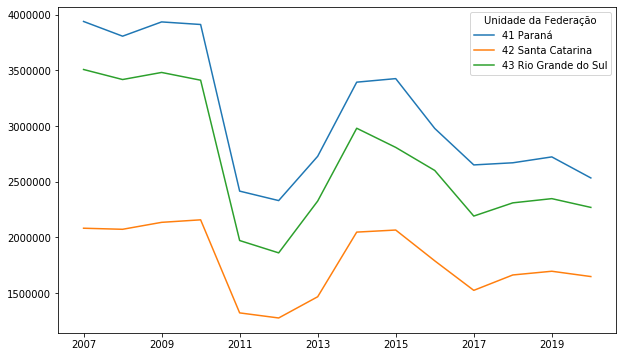

In [122]:
(usaveis[20:23].T.plot(figsize = (10,6)), cobertura_imunizacao[20:23].T.plot(figsize = (10,6)))
plt.show()

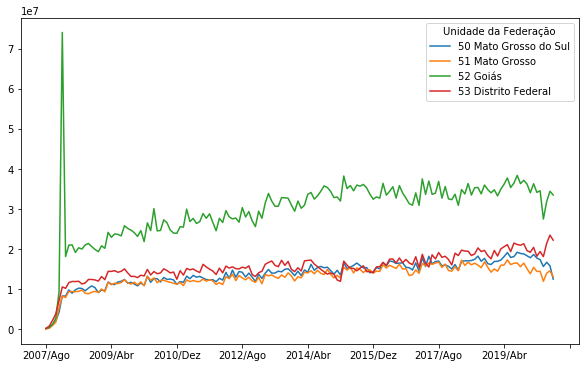

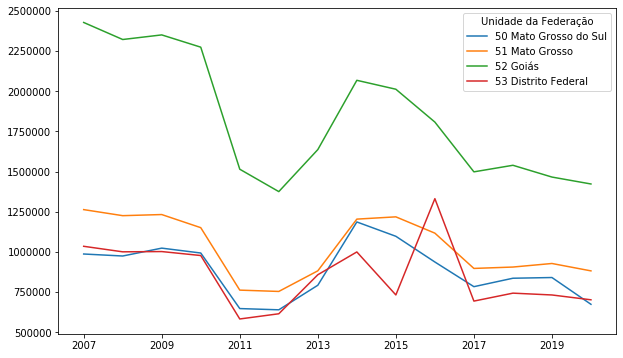

In [123]:
(usaveis[23:].T.plot(figsize = (10,6)), cobertura_imunizacao[23:].T.plot(figsize = (10,6)))
plt.show()

### **Existem alguns dados discrepantes, principalmente na região sudeste, que estão atrapalhando a visualização. Vamos arrumá-los para melhorar a visualização.**

### **Em uma primeira rodada de observação, pode-se inferir que a baixa na cobertura vacinal possui influencia no aparente aumento de gastos das diferentes Unidades da Federação. Ainda precisaremos virificar essa proposição com mais cautela!**

In [126]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51


In [128]:
colunas_interesse = usaveis.columns[6:]
usaveis = usaveis[colunas_interesse]
usaveis.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51


### **Por algum motivo, aqueles valores elevadíssimos estavam nos dados. Vamos verificar se os valores absurdos se foram.**

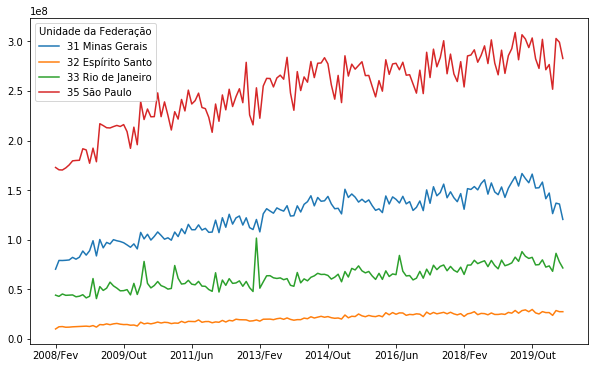

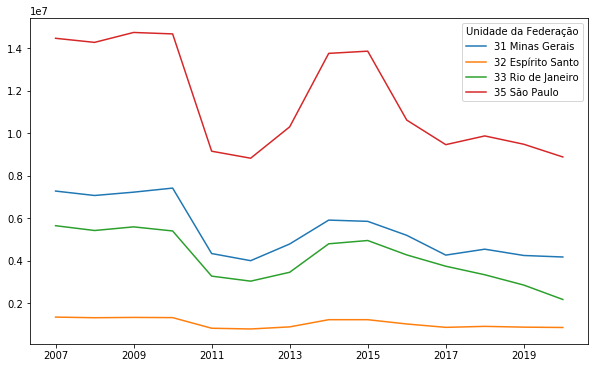

In [129]:
(usaveis[16:20].T.plot(figsize = (10,6)), cobertura_imunizacao[16:20].T.plot(figsize = (10,6)))
plt.show()

### **Agora a comparação dos dados pode ser realizada de modo mais proporcional, como podemos ver no gráfico acima!**

### **Como o ano de 2007 foi retirado do dataset dos gastos com saúde, irei retirar o ano de 2007 do sataset de cobertura vacinal com o intuito de realizar uma análise mais justa, comparando somente os mesmos anos.**

In [130]:
cobertura_imunizacao.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,
11 Rondônia,671022,670070,681503,647582,435345,427785,487788,664623,692060,619782,490277,464224,472702,427147
12 Acre,386861,379638,390602,375827,257132,240469,240916,254867,294119,259444,226433,233104,257688,194545
13 Amazonas,1704003,1647149,1703841,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1199874,1212871,1309691,1067561
14 Roraima,218408,203350,225293,216961,146403,134478,137917,223255,261569,223781,205714,192654,187129,155341
15 Pará,3997712,3856972,3699454,3535221,2159285,2120596,2217128,2577588,2121121,1986047,1736141,1772620,1922339,1605941


In [131]:
colunas_interesse2 = cobertura_imunizacao.columns[1:]
cobertura_imunizacao = cobertura_imunizacao[colunas_interesse2]
cobertura_imunizacao.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,
11 Rondônia,670070,681503,647582,435345,427785,487788,664623,692060,619782,490277,464224,472702,427147
12 Acre,379638,390602,375827,257132,240469,240916,254867,294119,259444,226433,233104,257688,194545
13 Amazonas,1647149,1703841,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1199874,1212871,1309691,1067561
14 Roraima,203350,225293,216961,146403,134478,137917,223255,261569,223781,205714,192654,187129,155341
15 Pará,3856972,3699454,3535221,2159285,2120596,2217128,2577588,2121121,1986047,1736141,1772620,1922339,1605941


### **Agora vamos ver como os gráficos se comportam sem os valores elevados!**

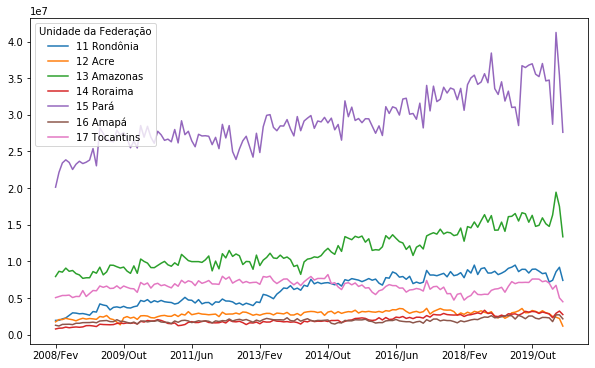

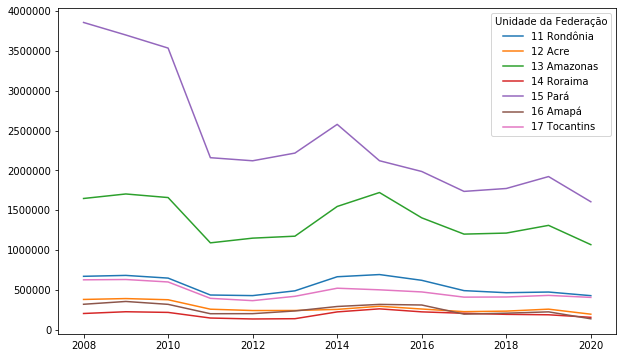

In [132]:
(usaveis[:7].T.plot(figsize = (10,6)), cobertura_imunizacao[:7].T.plot(figsize = (10,6)))
plt.show()

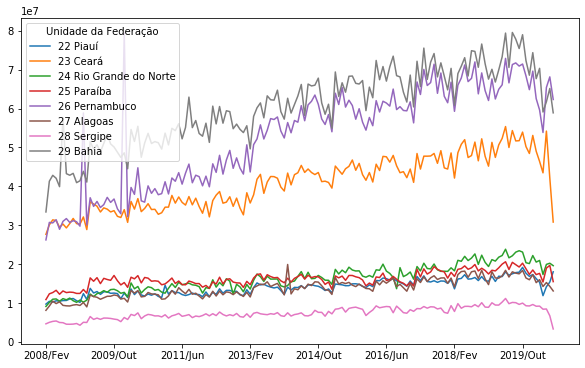

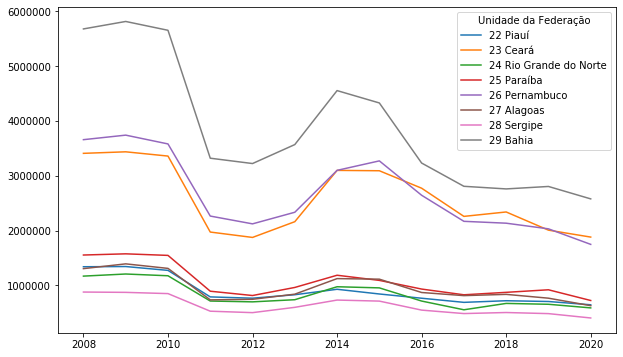

In [133]:
(usaveis[8:16].T.plot(figsize = (10,6)), cobertura_imunizacao[8:16].T.plot(figsize = (10,6)))
plt.show()

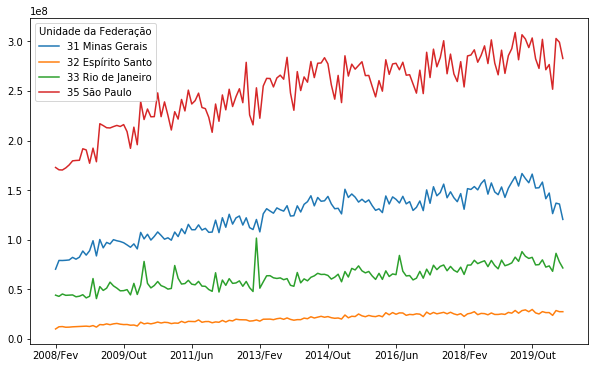

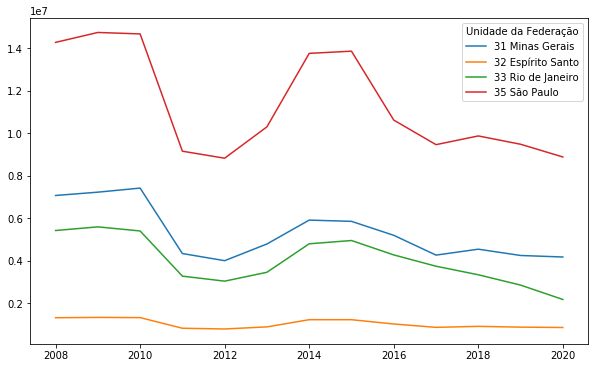

In [134]:
(usaveis[16:20].T.plot(figsize = (10,6)), cobertura_imunizacao[16:20].T.plot(figsize = (10,6)))
plt.show()

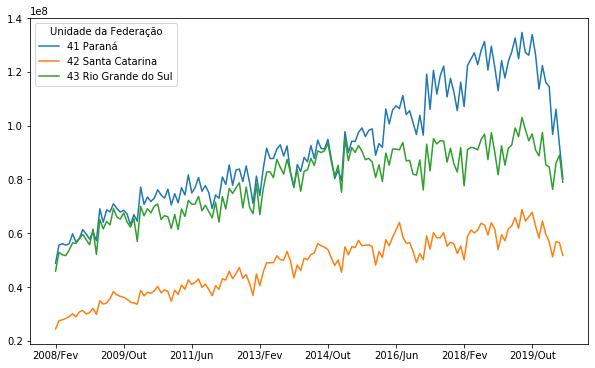

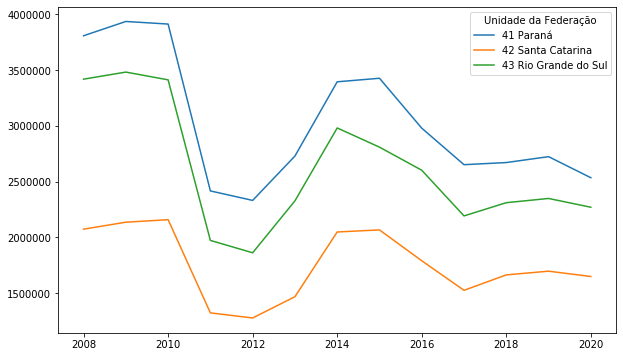

In [135]:
(usaveis[20:23].T.plot(figsize = (10,6)), cobertura_imunizacao[20:23].T.plot(figsize = (10,6)))
plt.show()

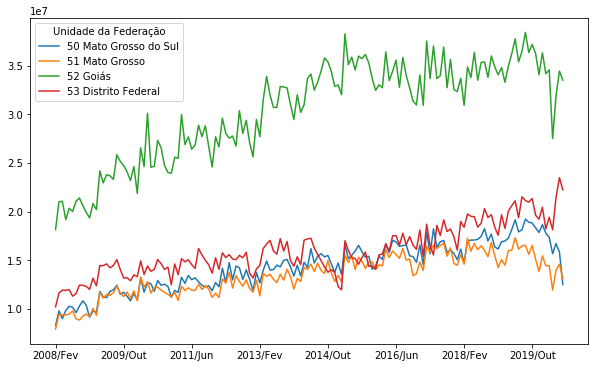

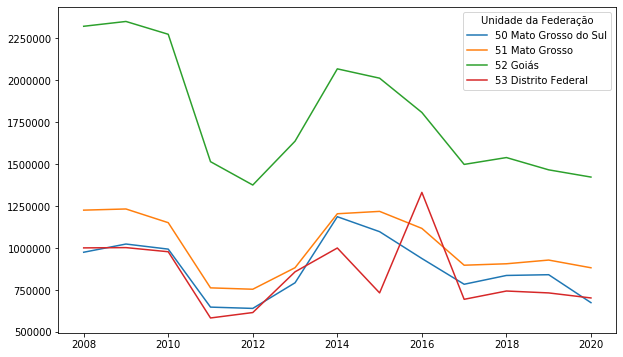

In [136]:
(usaveis[23:].T.plot(figsize = (10,6)), cobertura_imunizacao[23:].T.plot(figsize = (10,6)))
plt.show()

### **A comparação agora parece estar mais adequada. Agora os valores elevados não mascaram a flutuação dos dados ao longo tempo e os gráficos podem ser melhor visualizados.**

### **O próximo passo será melhorar os gráficos!**

##### **OBS: Gráficos de comida nem pensar.**

In [147]:
usaveis2 = usaveis/1000000

In [154]:
cobertura_imunizacao2 = cobertura_imunizacao/1000000

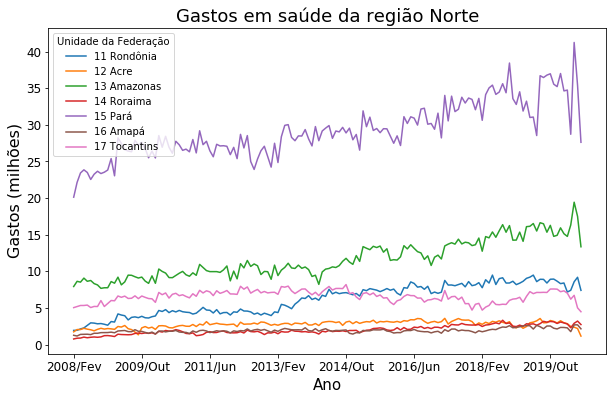

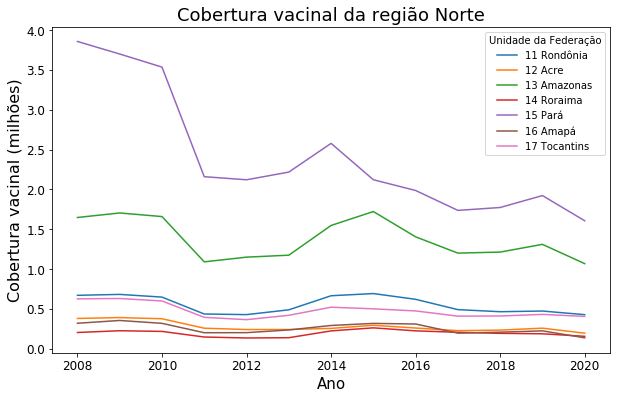

In [167]:
usaveis2[:7].T.plot(figsize = (10,6)) 
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Gastos (milhões)', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Gastos em saúde da região Norte', fontsize = 18)

cobertura_imunizacao2[:7].T.plot(figsize = (10,6))
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Cobertura vacinal (milhões)', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Cobertura vacinal da região Norte', fontsize = 18)

plt.show()

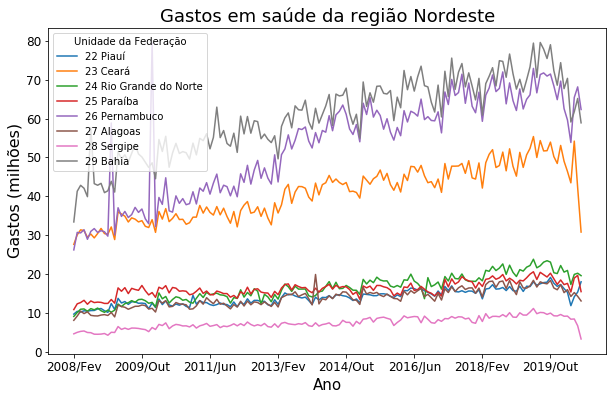

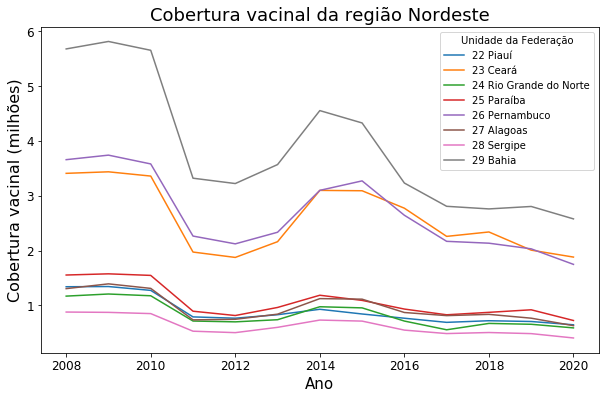

In [168]:
usaveis2[8:16].T.plot(figsize = (10,6)) 
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Gastos (milhões)', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Gastos em saúde da região Nordeste', fontsize = 18)

cobertura_imunizacao2[8:16].T.plot(figsize = (10,6))
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Cobertura vacinal (milhões)', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Cobertura vacinal da região Nordeste', fontsize = 18)

plt.show()

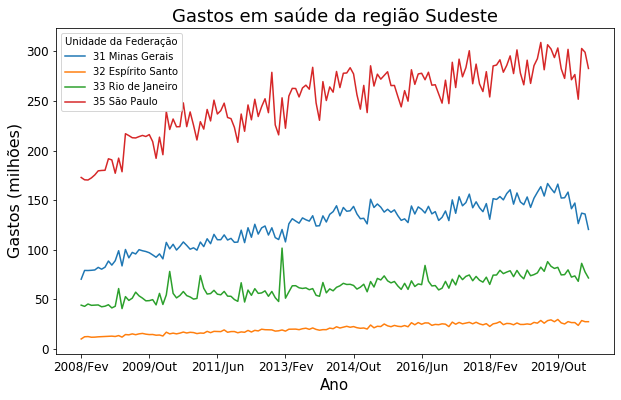

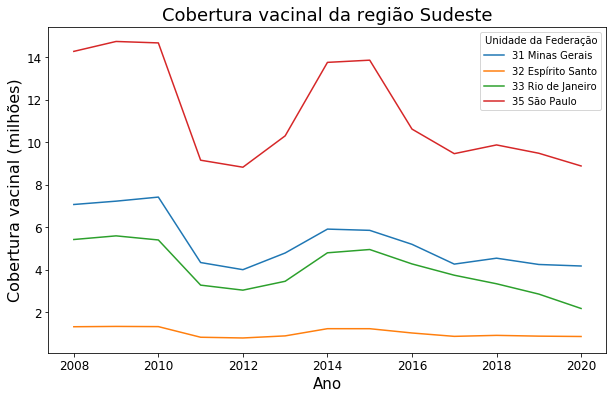

In [169]:
usaveis2[16:20].T.plot(figsize = (10,6)) 
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Gastos (milhões)', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Gastos em saúde da região Sudeste', fontsize = 18)

cobertura_imunizacao2[16:20].T.plot(figsize = (10,6))
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Cobertura vacinal (milhões)', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Cobertura vacinal da região Sudeste', fontsize = 18)

plt.show()

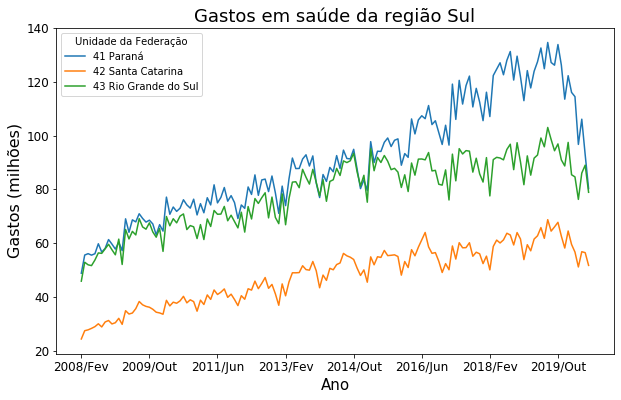

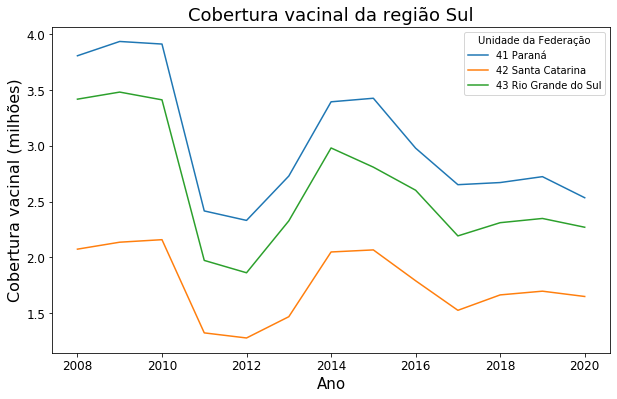

In [170]:
usaveis2[20:23].T.plot(figsize = (10,6)) 
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Gastos (milhões)', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Gastos em saúde da região Sul', fontsize = 18)

cobertura_imunizacao2[20:23].T.plot(figsize = (10,6))
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Cobertura vacinal (milhões)', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Cobertura vacinal da região Sul', fontsize = 18)

plt.show()

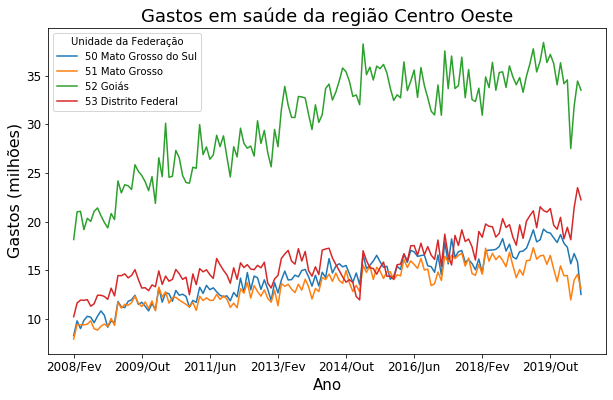

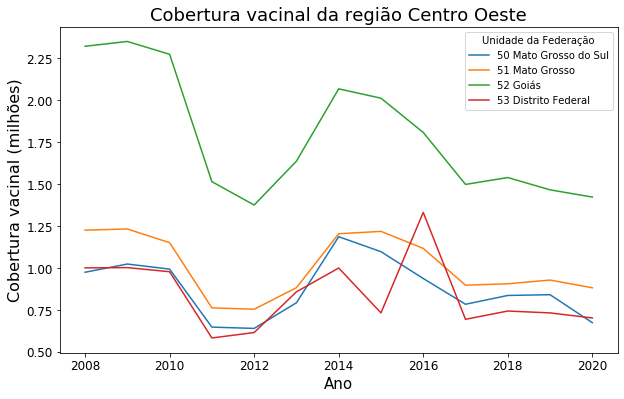

In [171]:
usaveis2[23:].T.plot(figsize = (10,6)) 
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Gastos (milhões)', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Gastos em saúde da região Centro Oeste', fontsize = 18)

cobertura_imunizacao2[23:].T.plot(figsize = (10,6))
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Cobertura vacinal (milhões)', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Cobertura vacinal da região Centro Oeste', fontsize = 18)

plt.show()

## **Visualizando os gráficos e comparando os gastos em saúde com a cobertura vacinal dentro de um mesmo intervalo de tempo pode-se observar que a percentagem de cobertura vacinal é menor quando onde a percentagem de gastos em saúde é maior mostrando uma aparente proporcionalidade invertida que será investigada conforme os próximos módulos avançam.**


In [172]:
usaveis2

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1.94,1.96,2.14,2.28,2.62,2.97,2.94,2.84,2.88,2.78,...,8.92,8.95,8.66,8.33,8.41,7.17,7.42,8.58,9.19,7.41
12 Acre,1.74,2.06,2.06,2.23,2.11,2.03,1.89,2.08,2.23,2.12,...,3.29,3.17,2.96,3.26,2.98,2.86,2.47,2.38,2.20,1.16
13 Amazonas,7.93,8.64,8.53,9.08,8.65,8.76,8.33,8.15,7.68,7.76,...,16.28,14.78,14.92,15.94,15.14,14.77,16.33,19.44,17.51,13.36
14 Roraima,0.77,0.88,0.90,1.03,0.94,1.00,1.05,1.00,1.06,1.22,...,3.16,3.12,2.89,3.08,2.97,2.81,2.30,2.91,3.22,2.74
15 Pará,20.13,22.15,23.44,23.86,23.50,22.54,23.26,23.67,23.35,23.54,...,36.97,35.56,35.22,37.01,34.64,34.75,28.71,41.25,35.40,27.62
16 Amapá,1.28,1.18,1.40,1.41,1.42,1.37,1.55,1.55,1.64,1.65,...,2.54,2.24,2.14,2.35,2.34,2.29,1.77,2.70,2.70,2.16
17 Tocantins,5.05,5.20,5.34,5.34,5.40,5.06,5.21,5.20,6.01,5.21,...,7.59,7.59,7.57,7.23,7.34,7.03,6.20,6.73,5.02,4.49
21 Maranhão,13.45,14.75,15.15,14.54,14.55,14.54,14.61,15.32,15.62,15.64,...,30.16,30.85,29.63,31.26,28.46,28.83,23.94,32.98,31.13,24.37
22 Piauí,9.71,10.43,10.23,10.56,10.47,10.62,10.65,11.04,11.14,10.58,...,19.16,17.65,16.85,17.31,16.26,15.32,11.88,14.18,15.38,18.02


In [174]:
usaveis2['Total'] = usaveis2.sum(axis = 1)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51


In [181]:
usaveis2.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1.94,1.96,2.14,2.28,2.62,2.97,2.94,2.84,2.88,2.78,...,8.95,8.66,8.33,8.41,7.17,7.42,8.58,9.19,7.41,922.53
12 Acre,1.74,2.06,2.06,2.23,2.11,2.03,1.89,2.08,2.23,2.12,...,3.17,2.96,3.26,2.98,2.86,2.47,2.38,2.20,1.16,417.75
13 Amazonas,7.93,8.64,8.53,9.08,8.65,8.76,8.33,8.15,7.68,7.76,...,14.78,14.92,15.94,15.14,14.77,16.33,19.44,17.51,13.36,1747.04
14 Roraima,0.77,0.88,0.90,1.03,0.94,1.00,1.05,1.00,1.06,1.22,...,3.12,2.89,3.08,2.97,2.81,2.30,2.91,3.22,2.74,301.78
15 Pará,20.13,22.15,23.44,23.86,23.50,22.54,23.26,23.67,23.35,23.54,...,35.56,35.22,37.01,34.64,34.75,28.71,41.25,35.40,27.62,4383.00


In [186]:
razao_gasto = usaveis2['Total'] / usaveis2['Total'].loc['35 São Paulo']

In [183]:
cobertura_imunizacao2['Total'] = cobertura_imunizacao2.sum(axis = 1)
cobertura_imunizacao2.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Unidade da Federação,,,,,,,,,,,,,,
11 Rondônia,0.67,0.68,0.65,0.44,0.43,0.49,0.66,0.69,0.62,0.49,0.46,0.47,0.43,7.18
12 Acre,0.38,0.39,0.38,0.26,0.24,0.24,0.25,0.29,0.26,0.23,0.23,0.26,0.19,3.60
13 Amazonas,1.65,1.70,1.66,1.09,1.15,1.17,1.55,1.72,1.40,1.20,1.21,1.31,1.07,17.89
14 Roraima,0.20,0.23,0.22,0.15,0.13,0.14,0.22,0.26,0.22,0.21,0.19,0.19,0.16,2.51
15 Pará,3.86,3.70,3.54,2.16,2.12,2.22,2.58,2.12,1.99,1.74,1.77,1.92,1.61,31.31


In [185]:
razao_vacina = cobertura_imunizacao2['Total'] / cobertura_imunizacao2['Total'].loc['35 São Paulo']

In [195]:
razao_gasto = razao_gasto.sort_values(ascending = False)

In [196]:
razao_vacina = razao_vacina.sort_values(ascending = False)

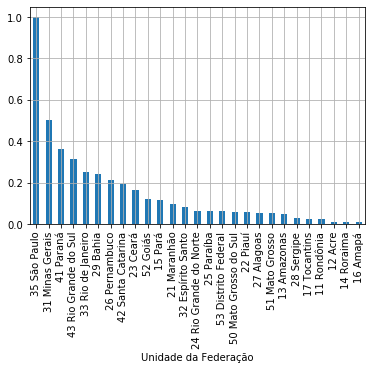

In [199]:
razao_gasto.plot(kind = 'bar')
plt.grid()
plt.show()

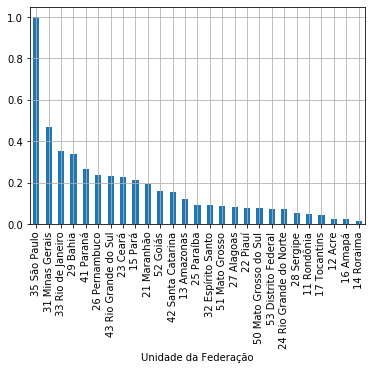

In [200]:
razao_vacina.plot(kind = 'bar')
plt.grid()
plt.show()

## **As razões nos gráficos de barra acima a respeito dos gastos e cobertura vacinal não incluem as diferenças entre as populações das Unidades da Federação. Para que essa comparação fique mais justa seria necessário realizar uma reamostragem pelo total da população! O que será feito conforme os módulos avançam.**